importer les bibliothèques

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,explained_variance_score,r2_score

fonction pour selectionner les entrées et la sortie en format de série temporelle

In [4]:
def split_data_x(x_trai):
    x_train=[]
    for i in range(len(x_trai)):
        x_tr=[]
        for k in range(len(x_trai[0][0])): 
            for j in range(len(x_trai[0])):
                x_tr.append(x_trai[i][j][k])
        x_train.append(x_tr)
    return np.array(x_train)

def split_data_y(y_trai):
    y_train=[]
    for i in range(len(y_trai)):
        y_tr=[]
        for k in range(len(y_trai[0])):
            y_tr.append(y_trai[i][k][0])
        y_train.append(y_tr)
    return np.array(y_train)

l'erreur nRMSE

In [5]:
def nrmse(y_test,y_pred):
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    return rmse/(y_test.max()-y_test.min())

fonction pour nettoyer les données et convertir leures types de données

In [6]:
def cleaning_data(df):
    
    df=df.drop_duplicates()
    data= pd.DataFrame(columns=[])
    
    data['Time']=df['Time'].astype(str)
    data['P_DC']=df['P_DC'].astype(float)
    data['Global Horiz']=df['Global Horiz'].astype(float)
    data['Clear-Sky']=df['Clear-Sky'].astype(float)
    data['Temperature']=df['Temperature'].astype(float)
    data['Wind direction']=df['Wind direction'].astype(float)
    
    data['Hour']=data['Time'].str[11:13]
    data['Min']=data['Time'].str[14:16]
    
    data['Hour']=data['Hour'].astype(int)
    data['Min']=data['Min'].astype(int)
    
    filt_hour=(data['Hour']!=22) & (data['Hour']!=23) & (data['Hour']!=0)
    data=data.loc[filt_hour]
    
    filt_min=(data['Min']==0)
    data=data.loc[filt_min]
    
    data=data[['P_DC','Global Horiz','Clear-Sky','Temperature','Wind direction']]
    
    return data

importer les donées à partir de fichier excel

In [7]:
df=pd.read_excel('data_total_final2.xlsx')

In [8]:
data=cleaning_data(df)

In [9]:
#Puissance DC sur k points

<AxesSubplot:>

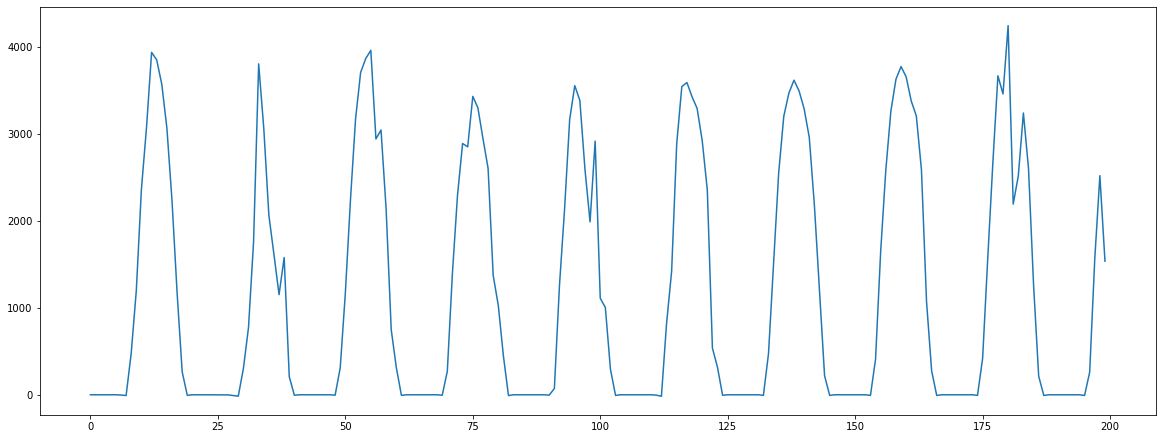

In [10]:
k=200
data['P_DC'][:k].plot(figsize=[20, 7.5])

le h signifie l'horizon de prévision: h=63 --> de h=1 à h=63

In [12]:
h=63
timesteps=12+h
n=100+timesteps-1

division les données à donnée d'entrainement et de teste

In [13]:
data_train=data[:len(data)-n].values
data_test=data[len(data)-n:len(data)].values

In [14]:
len(data_train),len(data_test)

(1860, 174)

créer un liste temporelle pour les données de l'entrainement

In [15]:
data_train_timesteps=np.array([[j for j in data_train[i:i+timesteps]] for i in range(0,len(data_train)-timesteps+1)])

In [16]:
#data_train_timesteps[:6],data_train_timesteps.shape

créer un liste temporelle pour les données de test

In [17]:
data_test_timesteps=np.array([[j for j in data_test[i:i+timesteps]] for i in range(0,len(data_test)-timesteps+1)])
data_test_timesteps.shape

(100, 75, 5)

In [18]:
#data_test_timesteps[:6],data_test_timesteps.shape

In [19]:
x_trai, y_trai = data_train_timesteps[:,:timesteps-h],data_train_timesteps[:,timesteps-h:timesteps]
x_tes, y_tes = data_test_timesteps[:,:timesteps-h],data_test_timesteps[:,timesteps-h:timesteps]

In [20]:
x_trai.shape, y_trai.shape, x_tes.shape, y_tes.shape

((1786, 12, 5), (1786, 63, 5), (100, 12, 5), (100, 63, 5))

In [21]:
x_train,x_test=split_data_x(x_trai),split_data_x(x_tes)

In [22]:
y_train,y_test=split_data_y(y_trai),split_data_y(y_tes)

In [23]:
y_train[0]

array([ 3.94019e+03,  3.85275e+03,  3.57222e+03,  3.06663e+03,
        2.23594e+03,  1.17420e+03,  2.63042e+02, -6.81070e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00, -1.21850e+00,
       -8.37450e+00, -1.62680e+01,  2.99992e+02,  7.70494e+02,
        1.75890e+03,  3.80780e+03,  3.06814e+03,  2.06558e+03,
        1.61399e+03,  1.15225e+03,  1.57958e+03,  2.08704e+02,
       -5.33550e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
       -4.75160e+00,  3.11711e+02,  1.16907e+03,  2.23587e+03,
        3.17117e+03,  3.70939e+03,  3.86902e+03,  3.96313e+03,
        2.94374e+03,  3.04637e+03,  2.13742e+03,  7.49527e+02,
        3.13423e+02, -6.69450e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00, -5.59740e+00,  2.68376e+02,  1.39504e+03,
        2.29465e+03,  2.89119e+03,  2.85276e+03])

In [24]:
x_train[0]

array([ 0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00, -2.95020e+00, -8.95000e+00,
        4.79113e+02,  1.19961e+03,  2.36471e+03,  3.07569e+03,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  2.70000e+01,  1.40000e+02,
        3.51000e+02,  5.13000e+02,  7.23000e+02,  8.59000e+02,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  5.50000e+01,  2.45000e+02,
        4.68000e+02,  6.72000e+02,  8.31000e+02,  9.32000e+02,
        2.92200e+02,  2.91660e+02,  2.91120e+02,  2.90550e+02,
        2.90180e+02,  2.89570e+02,  2.89970e+02,  2.92150e+02,
        2.94580e+02,  2.97300e+02,  2.99820e+02,  3.01880e+02,
        2.28630e+02,  2.31100e+02,  2.36540e+02,  2.39070e+02,
        2.39260e+02,  2.40900e+02,  2.47580e+02,  2.61550e+02,
        2.71260e+02,  2.73090e+02,  2.76400e+02,  2.81660e+02])

In [25]:
x_test[0]

array([ 2.33750e+03,  1.18885e+03,  3.12753e+02, -4.07920e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00, -9.03860e+00,
        6.13000e+02,  2.27000e+02,  2.48000e+02,  9.00000e+01,
        7.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  2.00000e+00,
        7.21000e+02,  5.29000e+02,  3.15000e+02,  1.21000e+02,
        1.10000e+01,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        3.16120e+02,  3.15520e+02,  3.14380e+02,  3.12200e+02,
        3.08630e+02,  3.06610e+02,  3.02120e+02,  3.01330e+02,
        3.00000e+02,  2.98890e+02,  2.97950e+02,  2.97320e+02,
        3.43000e+01,  6.15600e+01,  7.85700e+01,  9.07600e+01,
        1.01410e+02,  1.09010e+02,  1.57590e+02,  2.16320e+02,
        2.41540e+02,  2.43790e+02,  2.41570e+02,  2.41810e+02])

In [26]:
y_test[0]

array([ 3.42786e+02,  1.12776e+03,  1.99601e+03,  2.69275e+03,
        3.03417e+03,  3.27420e+03,  3.28558e+03,  2.83326e+03,
        2.70832e+03,  2.27429e+03,  1.12874e+03,  3.32379e+02,
       -4.31990e+00, -2.38000e-02,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
       -9.23930e+00,  3.69831e+02,  1.17034e+03,  2.07962e+03,
        2.80640e+03,  3.16386e+03,  3.35404e+03,  3.27764e+03,
        3.04501e+03,  2.68976e+03,  2.05502e+03,  1.17503e+03,
        3.41819e+02, -5.58930e+00, -4.01000e-02,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00, -1.03643e+01,  3.44738e+02,  1.23580e+03,
        2.22001e+03,  2.96907e+03,  3.39632e+03,  3.56915e+03,
        3.47757e+03,  3.29307e+03,  2.84411e+03,  2.21498e+03,
        1.24858e+03,  3.03716e+02, -9.76720e+00, -7.50000e-02,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00, -9.01860e+00])

In [27]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1786, 60), (1786, 63), (100, 60), (100, 63))

création de modèle random forest

In [30]:
rand_state=2000
model=RandomForestRegressor(random_state=rand_state)

l'entrainement de modèle

In [31]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=2000)

la prévison sur les données de test

In [32]:
y_pred=model.predict(x_test)

In [33]:
k=10
y_test[k]

array([ 1.12874e+03,  3.32379e+02, -4.31990e+00, -2.38000e-02,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00, -9.23930e+00,  3.69831e+02,
        1.17034e+03,  2.07962e+03,  2.80640e+03,  3.16386e+03,
        3.35404e+03,  3.27764e+03,  3.04501e+03,  2.68976e+03,
        2.05502e+03,  1.17503e+03,  3.41819e+02, -5.58930e+00,
       -4.01000e-02,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00, -1.03643e+01,
        3.44738e+02,  1.23580e+03,  2.22001e+03,  2.96907e+03,
        3.39632e+03,  3.56915e+03,  3.47757e+03,  3.29307e+03,
        2.84411e+03,  2.21498e+03,  1.24858e+03,  3.03716e+02,
       -9.76720e+00, -7.50000e-02,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
       -9.01860e+00,  3.11289e+02,  1.23185e+03,  2.24005e+03,
        2.98595e+03,  3.40924e+03,  3.57170e+03,  3.54139e+03,
        3.36016e+03,  2.90487e+03,  2.18281e+03])

In [34]:
y_pred[k]

array([ 1.27411724e+03,  6.45679194e+02,  2.43827786e+02,  8.45790270e+01,
        1.15771240e+01, -5.41375000e-01, -6.59000000e-04,  0.00000000e+00,
        0.00000000e+00, -1.63460000e-02, -1.04350550e+01,  2.29797991e+02,
        9.31653530e+02,  1.72471964e+03,  2.39076386e+03,  2.88197230e+03,
        3.13679402e+03,  3.07529670e+03,  2.90332890e+03,  2.54754276e+03,
        1.96532859e+03,  1.28686181e+03,  6.05360663e+02,  1.94385786e+02,
        6.79110500e+01,  2.30353900e+01, -6.70074000e-01, -6.29000000e-04,
        0.00000000e+00, -8.73880000e-02,  4.38693500e+00,  2.43228390e+01,
        3.23874154e+02,  1.13974141e+03,  1.93038752e+03,  2.57498575e+03,
        2.93344864e+03,  3.07519963e+03,  3.00718354e+03,  2.80441695e+03,
        2.42757948e+03,  1.97259560e+03,  1.20763860e+03,  4.88898262e+02,
        1.27911472e+02,  4.17879720e+01,  4.25894500e+00, -1.73488000e-01,
       -6.10000000e-05,  0.00000000e+00, -8.21820000e-02,  3.93355300e+00,
        2.10616580e+01,  

In [35]:
test_timestamps=np.array(range(len(y_pred[0])))
len(test_timestamps)

63

visualisation de données prédites et réelles

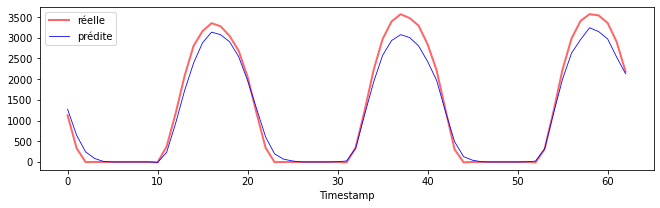

In [36]:
plt.figure(figsize=(11,3))
plt.plot(test_timestamps, y_test[k], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_pred[k], color = 'blue', linewidth=0.8)
plt.legend(['réelle','prédite'])
plt.xlabel('Timestamp')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


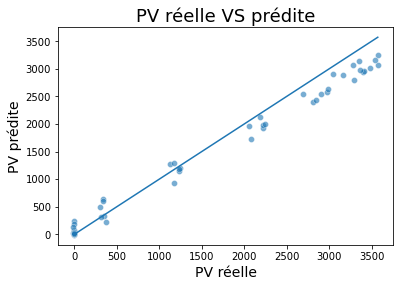

In [37]:
sns.scatterplot(x=y_test[k],y=y_pred[k], alpha=0.6)
sns.lineplot(y_test[k],y_test[k])

plt.xlabel('PV réelle',fontsize=14)
plt.ylabel('PV prédite',fontsize=14)
plt.title('PV réelle VS prédite',fontsize=18)
plt.show()

In [38]:
print(r2_score(y_test[k],y_pred[k])*100,"%")
print(mean_absolute_error(y_test[k],y_pred[k]))
print(mean_squared_error(y_test[k],y_pred[k]))
print(nrmse(y_test,y_pred)*100,"%")

97.30478583952561 %
161.53395073015867
52389.590616616115
6.038230377423403 %


# Model Deployement & Production

In [191]:
import joblib

In [192]:
joblib.dump(model,'model_RF_1h_to_72h.pkl')

['model_RF_1h_to_72h.pkl']

In [55]:
#loaded_model=joblib.load('model_RF_1h.pkl')